# Classification

In [3]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Reading and preparing the dataset

In [4]:
data = pandas.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
encoding_map = {'Gender': {'Male': 0, 'Female': 1}}
data.replace(encoding_map, inplace=True)

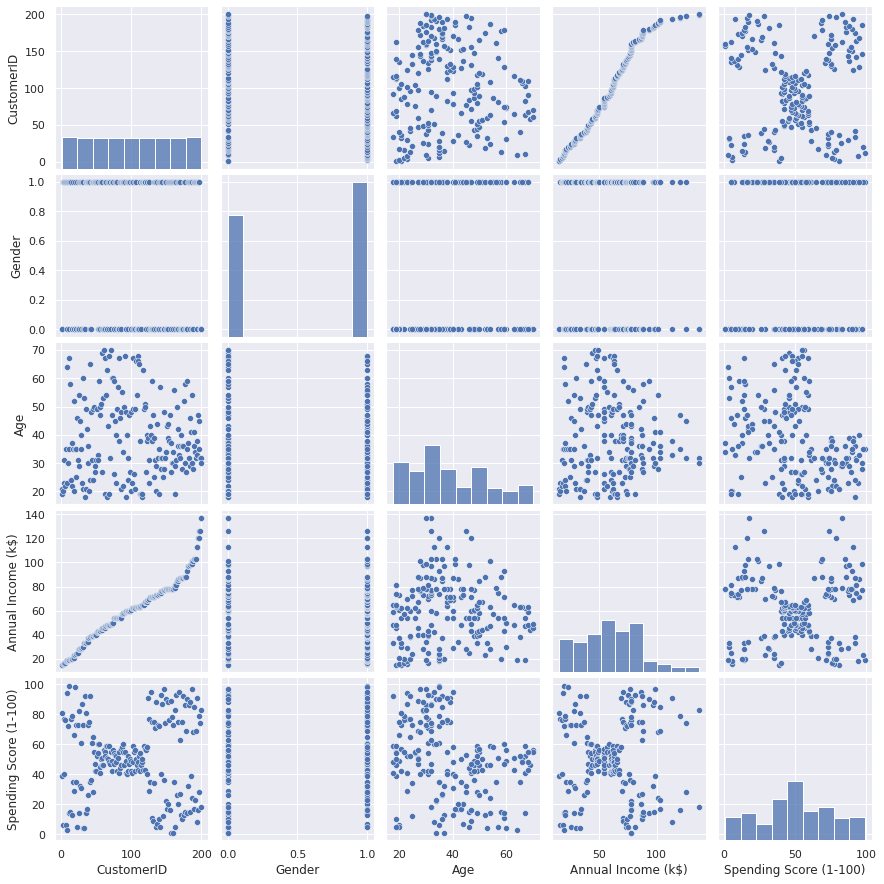

In [6]:
sns.pairplot(data)

## Select the features

Our aim is to classify the gender of customer with respect to age, income and spending score.

In [7]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
label = 'Gender'

X = data[features].values
y = data[label].values

In [8]:
print(X[:5])

[[19 15 39]
 [21 15 81]
 [20 16  6]
 [23 16 77]
 [31 17 40]]


## Normalize the dataset

In [9]:
from sklearn.preprocessing import normalize

X = normalize(X, norm='l1')
print(X[:5])

[[0.26027397 0.20547945 0.53424658]
 [0.17948718 0.12820513 0.69230769]
 [0.47619048 0.38095238 0.14285714]
 [0.19827586 0.13793103 0.6637931 ]
 [0.35227273 0.19318182 0.45454545]]


## Divide dataset into train, validation and test sets

In [10]:
from sklearn.model_selection import train_test_split

# 80% Train, 10% Validation, %10 Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=15)

In [11]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 200
Total # of sample in train dataset: 160
Total # of sample in validation dataset: 20
Total # of sample in test dataset: 20


# Classification Models

## Naive Bayes

<img src="https://miro.medium.com/max/1000/1*aoKlzTs3w5tomWWxZGr81g.png">

_*Image is taken from: https://laptrinhx.com/naive-bayes-classifier-2317120610/_


### Naive Bayes Classifier

$P(y|x) = \frac{P(x|y).P(y)}{P(x)}$


### Gaussian NB Classifier

$P(y|x) = \frac{G(x|y).P(y)}{P(x)}$

$G(x|y) = \frac{1}{\sqrt{2\pi\sigma^2_y}}.e^{\big(-\frac{(x-\mu_y)^2}{2\sigma^2_y}\big)}$

---

## Logistic Regression

<img src="https://www.researchgate.net/publication/335786324/figure/fig1/AS:802479209971712@1568337361258/Logistic-regression-and-linear-regression.jpg" width=750>

_*Image is taken from: https://www.researchgate.net/publication/335786324_Regression_Analysis_With_Differential_Privacy_Preserving_

---

## k-Nearest Neighbors

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png" width=350>

_*Image is taken from:https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn_

---

## Support Vector Machine

<img src="https://techvidvan.com/tutorials/wp-content/uploads/sites/2/2020/05/Support-Vector-Machines-1.jpg" width=450>

_*Image is taken from: https://techvidvan.com/tutorials/svm-in-r/_

In [12]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'kNN': KNeighborsClassifier(),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  print(f'{m} validation score => {score}')

GaussianNB validation score => 0.5
BernoulliNB validation score => 0.4
LogisticRegression validation score => 0.4
SVC validation score => 0.45
kNN validation score => 0.45


In [13]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
score = model.score(X_valid, y_valid)
print(f'knn validation score => {score}')

knn validation score => 0.45


In [14]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
score = model.score(X_valid, y_valid)
print(f'knn validation score => {score}')

knn validation score => 0.6


In [15]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
score = model.score(X_valid, y_valid)
print(f'SVC validation score => {score}')

SVC validation score => 0.4


In [16]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
score = model.score(X_valid, y_valid)
print(f'SVC validation score => {score}')

SVC validation score => 0.45


In [17]:
from sklearn.model_selection import cross_val_score

models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(kernel='rbf'),
    'kNN': KNeighborsClassifier(n_neighbors=3),
}

for m in models:
  model = models[m]
  score = cross_val_score(model, 
                          np.concatenate([X_train, X_valid]),
                          np.concatenate([y_train, y_valid]), 
                          cv=10)
  print(f'{m} cross validation score => {score.mean()}')



GaussianNB cross validation score => 0.5
BernoulliNB cross validation score => 0.5333333333333334
LogisticRegression cross validation score => 0.5055555555555555
SVC cross validation score => 0.48888888888888893
kNN cross validation score => 0.5000000000000001


## Evaluating the model


In [18]:
from sklearn.model_selection import train_test_split

model = BernoulliNB()
model.fit(X_train, y_train)

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score}')

Test score of trained model: 0.8


## Investigating the results

Accuracy: 0.8
Confussion matrix: 
[[ 0  4]
 [ 0 16]]



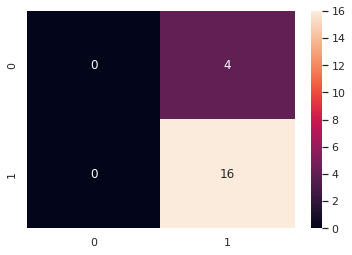

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

y_predictions = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_predictions)
print(f'Accuracy: {accuracy_score(y_test, y_predictions)}')
print(f'Confussion matrix: \n{conf_matrix}\n')

sns.heatmap(conf_matrix, annot=True)

## _Is accuracy metric enough for evaluating the model?_

Assume that you have _unbalanced_ dataset (10000 negative, 10 positive samples). The aim is to find those 10 positive sample in the dataset. If the model predicts all the samples as negative(0), the accuracy become high (~0.99), although the aim is not fulfilled. Thus, we need to use other metrics along with _accuracy_.

In [20]:
# aim is to find covid+

# in dataset
# covid+ (disease) patient: 100
# covid- (healthy) patient: 10000000

preds = [0, 0, 0, 0, 0, 0, 0, 0, 0]
groundtruth = [1, 0, 0, 0, 0, 0, 0, 0, 0]
print(f'Accuracy: {accuracy_score(groundtruth, preds)}')
print(f'F1 score: {f1_score(groundtruth, preds)}')

Accuracy: 0.8888888888888888
F1 score: 0.0


## Some useful metrics:

### Accuracy $= \frac{TP + TN}{TP + FP + TN + FN}$

### (P)recision $= \frac{TP}{TP + FP}$

### (R)ecall $= \frac{TP}{TP + FN}$

### F-1 Score $= \frac{2*P*R}{P+R}$


# Confussion Matrix: 
<img src="https://miro.medium.com/max/890/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg" alt="Drawing" width="400"/>

*_Image is taken: https://towardsdatascience.com/demystifying-confusion-matrix-29f3037b0cfa_



In [21]:
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

In [22]:
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'Precision: {precision}')
print(f'Recall   : {recall}')
print(f'F1 score : {f1score}')

Accuracy : 0.8
Precision: 0.8
Recall   : 1.0
F1 score : 0.888888888888889


In [23]:
print(f'Accuracy : {accuracy_score(y_test, y_predictions)}')
print(f'Precision: {precision_score(y_test, y_predictions)}')
print(f'Recall   : {recall_score(y_test, y_predictions)}')
print(f'F1 score : {f1_score(y_test, y_predictions)}')

Accuracy : 0.8
Precision: 0.8
Recall   : 1.0
F1 score : 0.888888888888889


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.80      1.00      0.89        16

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## An Iris Classification Model

In [25]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [26]:
print(iris_data.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [27]:
# 80% Train, 10% Validation, %10 Test
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=15) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=15)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 200
Total # of sample in train dataset: 120
Total # of sample in validation dataset: 15
Total # of sample in test dataset: 15


In [28]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(kernel='rbf'),
    'kNN': KNeighborsClassifier(n_neighbors=5),
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  print(f'{m} validation score => {score}')

GaussianNB validation score => 1.0
BernoulliNB validation score => 0.26666666666666666
LogisticRegression validation score => 1.0
SVC validation score => 1.0
kNN validation score => 1.0


In [29]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

validation_score = model.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score}')

Validation score of trained model: 1.0
Test score of trained model: 1.0


## Confusion matrix for non-binary classifiers

Accuracy: 1.0
Confussion matrix: 
[[4 0 0]
 [0 5 0]
 [0 0 6]]



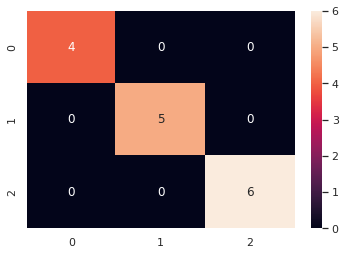

In [30]:
y_predictions = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_predictions)
print(f'Accuracy: {accuracy_score(y_test, y_predictions)}')
print(f'Confussion matrix: \n{conf_matrix}\n')

sns.heatmap(conf_matrix, annot=True)

In [31]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

